<a href="https://colab.research.google.com/github/heptacode/BigDatasProject/blob/master/EDA_and_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/insurance.csv')


오늘은 다양한 환자의 치료 비용 전용 데이터 세트를 살펴보겠습니다. 치료비는 진단, 진료 유형, 거주 도시, 나이 등 여러 가지 요인에 따라 달라집니다. 우리는 환자 진단에 대한 자료가 없습니다. 하지만 환자의 건강에 대한 결론을 내리고 회귀 분석을 실천하는 데 도움이 될 수 있는 다른 정보도 있습니다. 어쨌든, 저는 당신이 건강하길 바랍니다! 우리 자료를 보겠습니다.
![![image.png](attachment:image.png)](https://www.hipwee.com/wp-content/uploads/2017/02/hipwee-healthy2-1170x612-640x335.jpg)

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

좋은 날은 데이터에 "NaN"이 없는 날입니다.D입니다.
이에 대한 이해를 위해 데이터를 살펴보겠습니다.
우리는 주로 비용 금액에 관심이 있기 때문에 어떤 게시물이 요금과 더 관련이 있는지 볼 수 있습니다. 먼저 범주형 피쳐를 인코딩합니다.

In [ ]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

"지역" 코딩에 대한 몇 마디입니다. 일반적으로 변동성이 큰 범주형 변수는 OneHotEncoder 등을 사용하여 인코딩하는 것이 가장 좋습니다.  그러나 이 경우, 지역이 나열되는 특별한 순서가 없기 때문에, 아무것도 변하지 않을 것입니다. 그래서 저는 라벨 인코더만 사용해서 게을러지고 있습니다.

In [ ]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

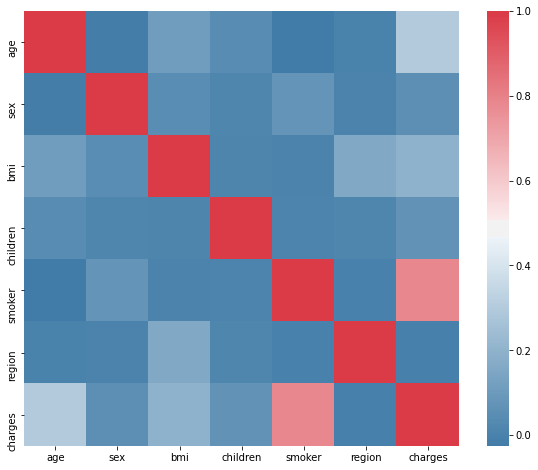

In [ ]:

f, ax = pl.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

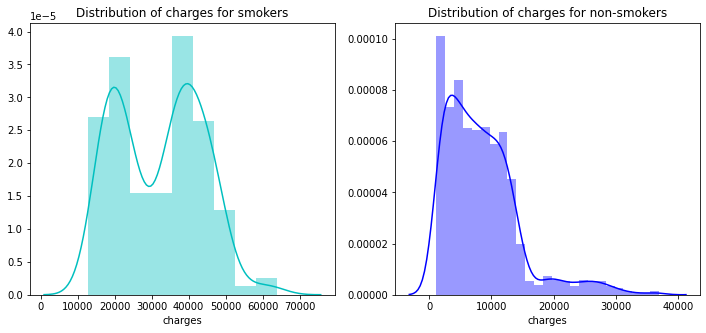

In [ ]:
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

흡연 환자들은 치료에 더 많은 돈을 씁니다. 하지만 금연 환자가 더 많다는 느낌이 있습니다. 확인하러 갑니다.

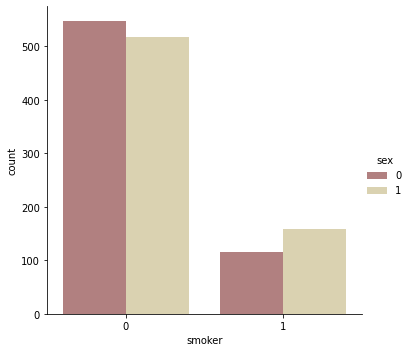

In [ ]:

sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)

Please note that women are coded with the symbol " 1 "and men - "0". Thus non-smoking people and the truth more. 
Also we can notice that more male smokers than women smokers. It can be assumed that the total cost of treatment in men will be more than in women, given the impact of smoking. Maybe we'll check it out later.
And some more useful visualizations. 

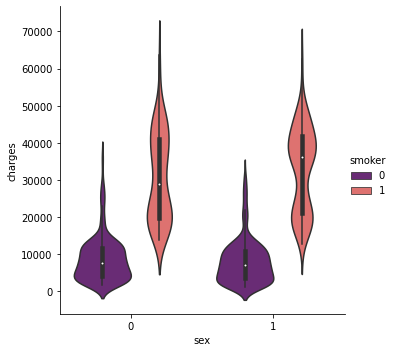

In [ ]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=data, palette = 'magma')

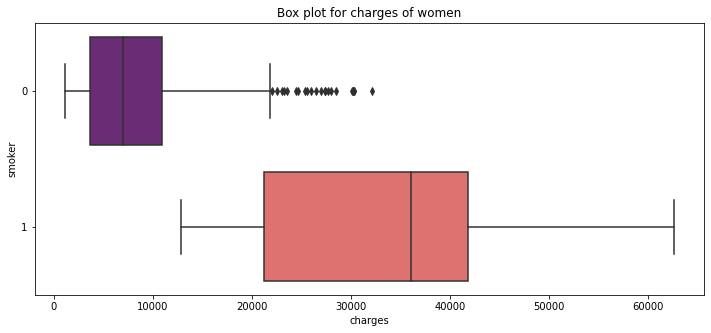

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'magma')

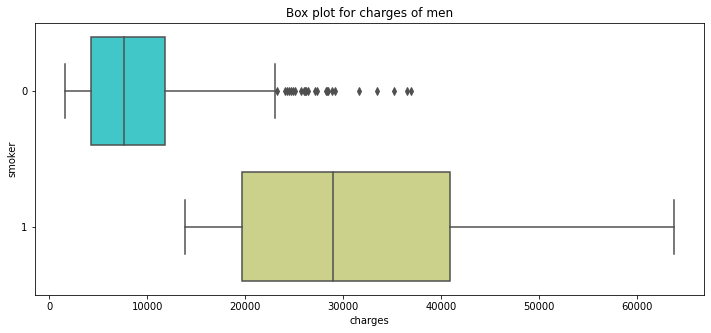

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')

Now let's pay attention to the age of the patients.  First, let's look at how age affects the cost of treatment, and also look at patients of what age more in our data set.

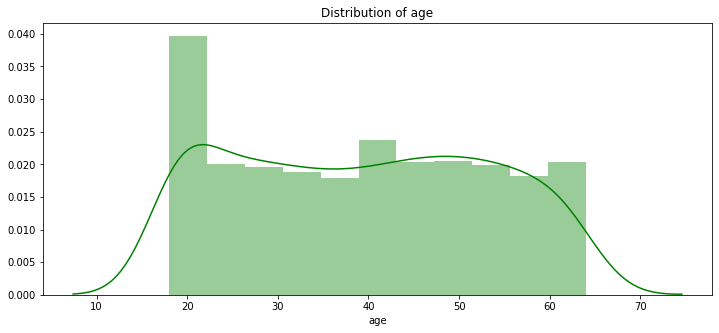

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

We have patients under 20 in our data set. Im 18 years old. This is the minimum age of patients in our set. The maximum age is 64 years. 
My personal interest is whether there are smokers among patients 18 years.

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

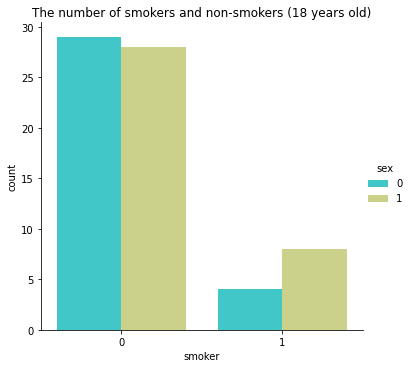

In [ ]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age == 18)])
pl.title("The number of smokers and non-smokers (18 years old)")

Oh. I was hoping the result would be different.
18 years old - a very young age. Does smoking affect the cost of treatment at this age?


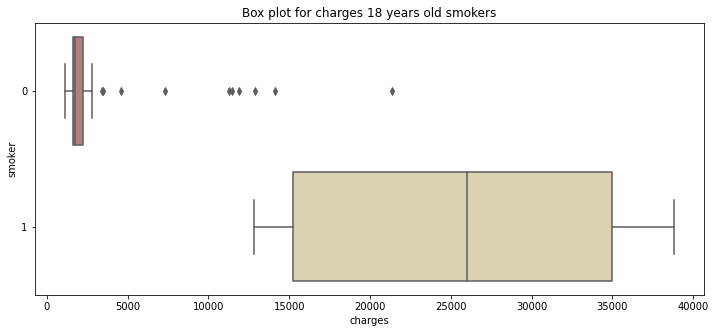

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')

![![image.png](attachment:image.png)](https://media.giphy.com/media/bgGainulgkZhK/giphy.gif)

Oh. As we can see, even at the age of 18 smokers spend much more on treatment than non-smokers. Among non-smokers we are seeing some " tails." I can assume that this is due to serious diseases or accidents.
Now let's see how the cost of treatment depends on the age of smokers and non-smokers patients.

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

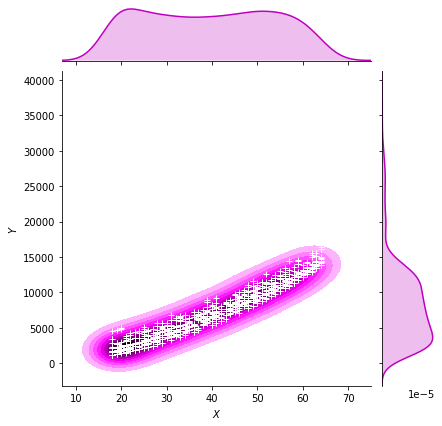

In [ ]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 0)],kind="kde", color="m")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

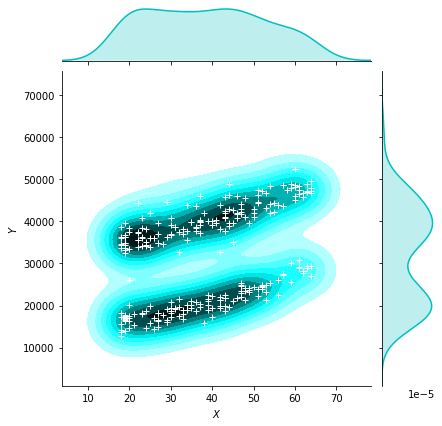

In [ ]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 1)],kind="kde", color="c")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

In [ ]:
#non - smokers
p = pl.figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker == 0)].age,y=data[(data.smoker == 0)].charges, size=7, line_color="navy", fill_color="pink", fill_alpha=0.9)

show(p)

TypeError: ignored

In [ ]:
#smokers
p = pl.figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker == 1)].age,y=data[(data.smoker == 1)].charges, size=7, line_color="navy", fill_color="red", fill_alpha=0.9)
show(p)

In [ ]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')

In non-smokers, the cost of treatment increases with age. That makes sense. So take care of your health, friends!  In smoking people, we do not see such dependence.
I think that it is not only in smoking but also in the peculiarities of the dataset. Such a strong effect of Smoking on the cost of treatment would be more logical to judge having a set of data with a large number of records and signs.
But we work with what we have!
Let's pay attention to bmi. I am surprised that this figure but affects the cost of treatment in patients. Or are we on a diet for nothing?
![![image.png](attachment:image.png)](https://img-s3.onedio.com/id-573af11b92f0c0f951a8561a/rev-0/raw/s-606439d8c0c1e9e794286a8431f3a54c57f31033.gif)

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

There's something insanely beautiful about this distribution, isn't there?  
The average BMI in patients is 30. I think I should go to the great Google with a question about this indicator. 
![![image.png](attachment:image.png)](http://1j4g1pasf991x0osxuqz6d10.wpengine.netdna-cdn.com/wp-content/uploads/2017/03/BMI-CHART-1024x791.png)
With a value equal to 30 starts obesity.  I also calculated my BMI and now I can safely eat a sandwich. Let's start to explore!
First, let's look at the distribution of costs in patients with BMI greater than 30 and less than 30.


In [ ]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

Patients with BMI above 30 spend more on treatment!

In [ ]:
g = sns.jointplot(x="bmi", y="charges", data = data,kind="kde", color="r")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of bmi and charges')


In [ ]:
pl.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'magma', size = 8)

Let's pay attention to children. First, let's see how many children our patients have.


In [ ]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, size = 6)

Most patients do not have children. Perfectly that some have 5 children! Children are happiness:)
I wonder if people who have children smoke.

In [ ]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=data[(data.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens')

Oh oh oh.....
![![image.png](attachment:image.png)](https://www.az-jenata.bg/media/az-jenata/files/galleries/640x480/4c0373972cdd156a2e2c008dc5c0a93a.jpg)
But I am glad that non-smoking parents are much more!

치료 비용을 예측하기 위해서 회귀 알고리즘을 이용할 것입니다. 회귀란 데이터를 독립변수 X와 종속변수 Y 사이의 수학적 관계를 모델링하고 예측하는 방법입니다.

 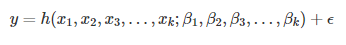

독립변수 X를 집의 속성(방의 개수, 넓이, 세금 등), 종속변수 Y를 집의 가격으로 두면 집의 속성과 집의 가격 사이의 수학적 관계를 찾아 모델링하고 예측을 하는 것을 회귀라고 할 수 있습니다.

이 중에서도 선형 회귀는 X와 Y간의 수학적 관계를 선형 그래프로 나타내어 예측하는 방법입니다.

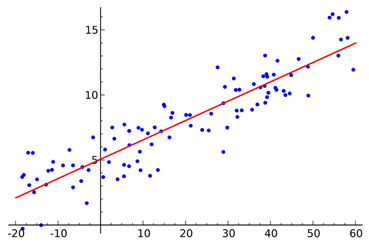
 
X와 Y의 선형적 패턴을 최소제곱법을 이용해 찾아 Y의 값으로 무엇이 나올지를 예측합니다

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
x = data.drop(['charges'], axis = 1)
y = data.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

PolynomialFeatures()는 다항 회귀를 위해 사용하는 전처리 함수인데, 여기서 다항 회귀란 비선형 데이터를 학습할 때 사용하는 회귀로 각 특성의 거듭제곱을 새 특성으로 추가하여 선형 모델로 그려내는 것이라고 할 수 있습니다.


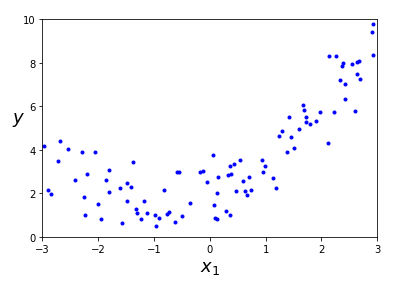

 
예시를 들자면, 이러한 비선형 데이터에서
 

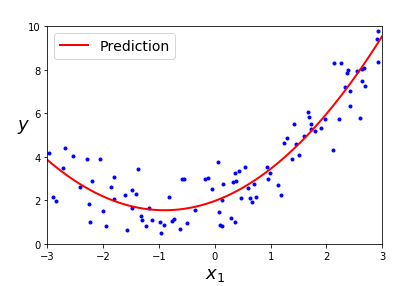

 
이러한 선형 모델을 만들기 위해 PolynomialFeatures()를 이용하여 특성간의 관계를 찾을 수 있도록 도와주는 것입니다.

In [ ]:
X = data.drop(['charges','region'], axis = 1)
Y = data.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

랜덤 포레스트를 이용하여 앙상블을 해봅시다
눈누난나
어우예아 휘바~~~~~

In [ ]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

In [ ]:
pl.figure(figsize=(10,6))

pl.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
pl.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
pl.show()

![![image.png](attachment:image.png)](https://pa1.narvii.com/6768/0df1e15da5ca7405050f9ff377f8b369f884aebf_00.gif)